# Linear Regression

# Structure and Gradient Descent

On the next stop of our tour, we will look at another simple, single neuron model, but this time, we will not be using it for classification, but for the other mode of supervised learning: regression.

Linear regression models the relationship between a dependent variable and one or more independent variables. The goal of linear regression is to find the line of best fit that minimizes a cost function of the differences between the predicted and actual values of the dependent variable.

As opposed to the perceptron's sign function, the linear regression model uses a linear activation function, which outputs the sum of the product of each input feature and its corresponding weight, plus a bias term. In other words, the output of a neuron is simply $z$. Just like the perceptron, The weights and bias term are learned during the training process and are adjusted to minimize the difference between the predicted and actual values of the dependent variable. The output of the linear activation function is the predicted value of the dependent variable.



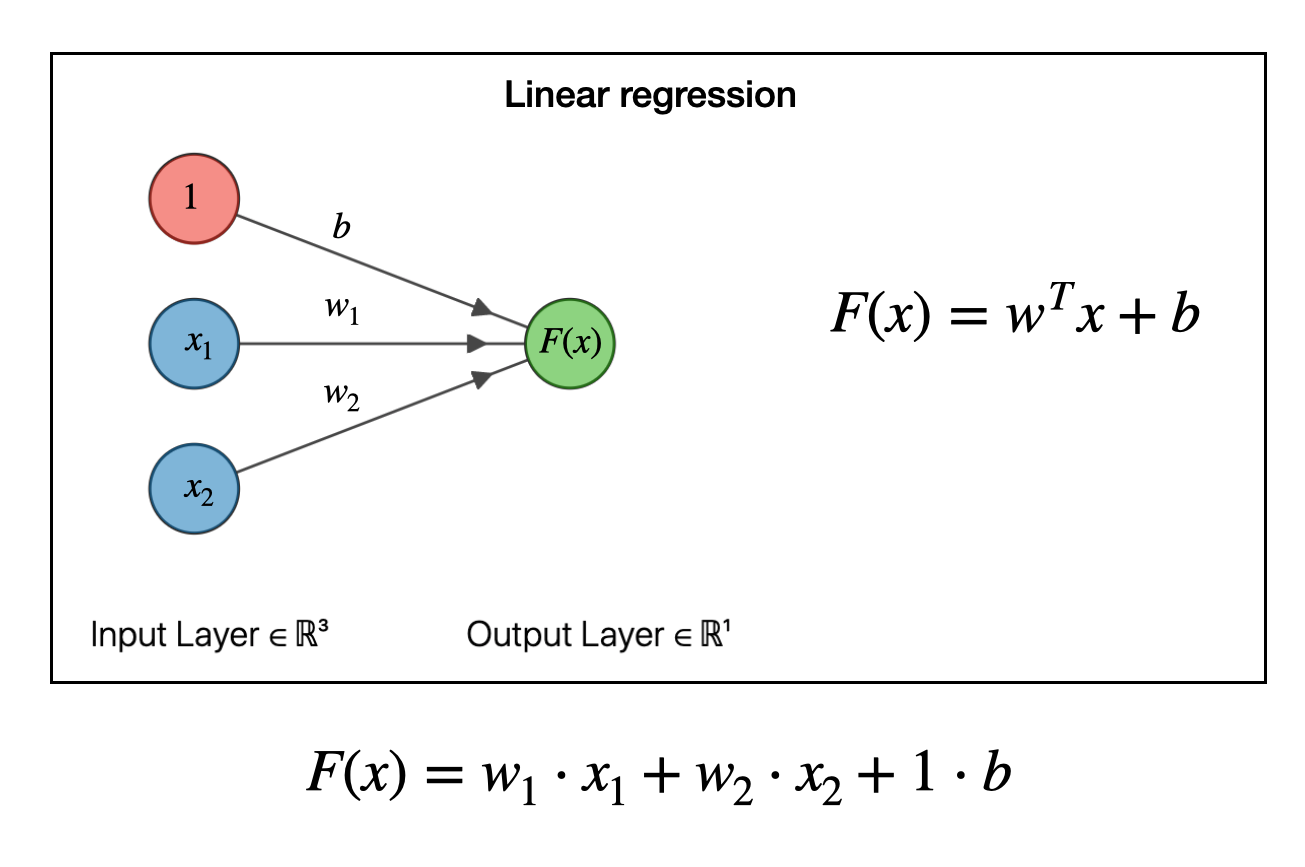
Visual from https://joshuagoings.com/2020/05/05/neural-network/

To train the linear regression model, we need to define a cost function, which measures how well the model is performing on the training data. In the case of linear regression, the most commonly used cost function is the mean squared error (MSE) function. The MSE function calculates the average of the squared differences between the predicted and actual values of the dependent variable. The goal of the training process is to minimize the value of the MSE function.

To minimize the MSE function, we use an optimization algorithm called gradient descent. Gradient descent is an iterative algorithm that starts with an initial set of weights and bias term and updates them at each iteration to move in the direction of steepest descent of the cost function. In other words, gradient descent calculates the gradient of the cost function with respect to the weights and bias term and updates them in the direction of the negative gradient. The learning rate hyperparameter controls the size of the updates, which can affect the speed and stability of the training process.

During the training process, the linear regression model repeatedly updates the weights and bias term using gradient descent until the value of the cost function converges to a minimum. At this point, the model has learned the optimal set of weights and bias term that minimize the difference between the predicted and actual values of the dependent variable. This trained model can then be used to make predictions on new data.

Two common forms of gradient descent exist: batch gradient descent and Stochastic Gradient Desent. In batch gradient descent, the "full gradient". That is to say, this algorithm updates the model parameters (weights and bias) based on the average of the gradients of the cost function with respect to the parameters computed over the entire training set. In other words, batch gradient descent calculates the gradient of the cost function with respect to the model parameters for each example in the training set, and then updates the parameters by taking the average of these gradients. 

Stochastic gradient descent, on the other hand, updates the model parameters based on the gradient of the cost function with respect to the parameters computed on a single example or a small subset of examples (also known as a mini-batch). In other words, stochastic gradient descent randomly selects one example or a small subset of examples from the training set and calculates the gradient of the cost function with respect to the model parameters for that example or subset, and then updates the parameters using these gradients.

In [ ]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                errors += .5*((self.predict(xi) - target)**2)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)

def linear_activation(z):
    return z

# Application and Analysis

So, how can we apply linear regression to our data set? Suppose we want to want to predict the seed of a team based on their effective field goal percentage. Of course, we would do better by introducing more features as we did with the perceptron, but we choose to keep this model simple for illustrative purposes. So, we can implement a single neuron model with linear activation that uses either gradient descent algorithm to model the relationship between the two.

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import seaborn as sns
sns.set_theme()

# Load the dataset
url = r"https://raw.githubusercontent.com/joshyaffee/A-First-Semester-of-Machine-Learning---INDE-577/main/Datasets/cbb.csv"
df = pd.read_csv(url)
# df.drop not in tournament
df = df.dropna()

# let's take a look
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017


In [ ]:
# Extract the relevant columns
X = df.iloc[:, [7]].values
y = df.iloc[:, 22].values

Text(0.5, 1.0, 'MSE Error at Each Epoch During Training')

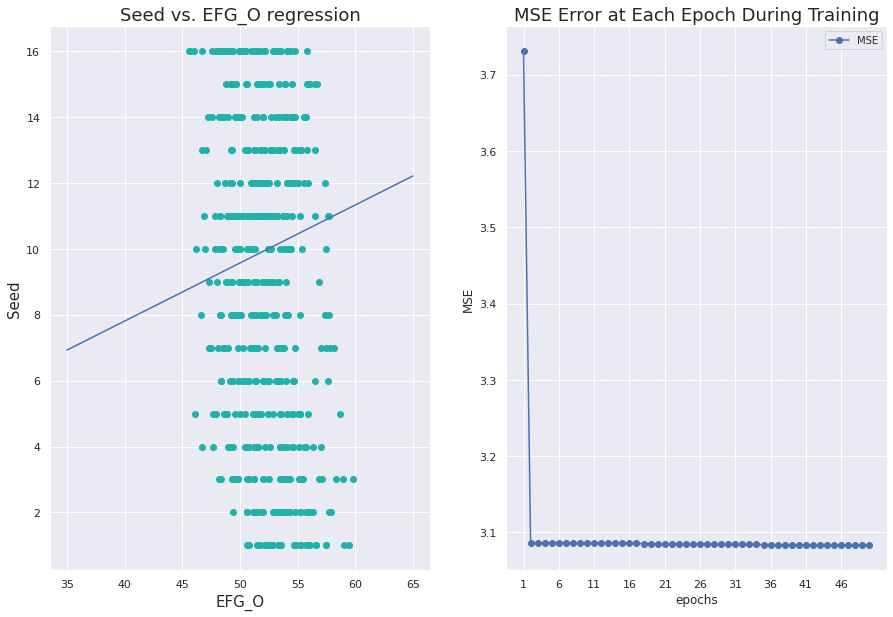

In [ ]:
node = SingleNeuron(linear_activation)
node.train(X, y, alpha = .0001, epochs = 50)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(X, y, color = "lightseagreen")
domain = np.linspace(35,65,40)
ax1.plot(domain, node.predict(domain.reshape(-1, 1)))
ax1.set_xlabel("EFG_O", fontsize = 15)
ax1.set_ylabel("Seed", fontsize = 15)
ax1.set_title("Seed vs. EFG_O regression", fontsize = 18)

ax2.plot(range(1, len(node.errors_) + 1), 
         node.errors_[:],
         marker = "o",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(node.errors_) + 1, 5))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)

A very unsatisfying result, but still informative. The results tell us that there's a lot more to getting seeded than effective field goal percentage. In this case, the model simply won't be good enough to make useful predictions due to the lack of information about the teams. To exemplify the strength of this model, let's look at a pair of more correlated features. 

Text(0.5, 1.0, 'MSE Error at Each Epoch During Training')

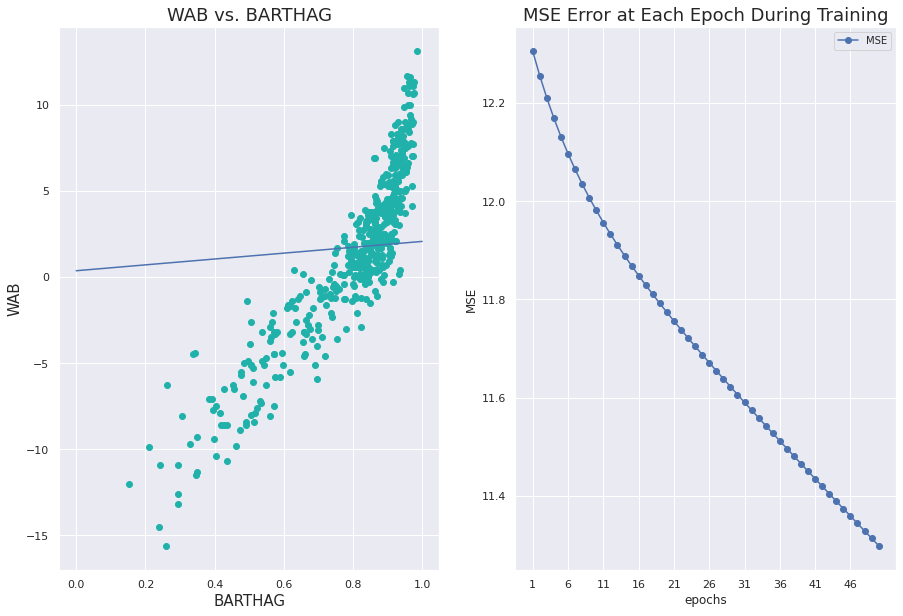

In [ ]:
# Extract the relevant columns
X = df.iloc[:, [6]].values
y = df.iloc[:, 20].values

node = SingleNeuron(linear_activation)
node.train(X, y, alpha = .0001, epochs = 50)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(X, y, color = "lightseagreen")
domain = np.linspace(0,1,100)
ax1.plot(domain, node.predict(domain.reshape(-1, 1)))
ax1.set_xlabel("BARTHAG", fontsize = 15)
ax1.set_ylabel("WAB", fontsize = 15)
ax1.set_title("WAB vs. BARTHAG", fontsize = 18)

ax2.plot(range(1, len(node.errors_) + 1), 
         node.errors_[:],
         marker = "o",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(node.errors_) + 1, 5))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)

Alas, a correlated dataset, but now we see the importance of hyperparameters. It seems like the model is not learning enough, so let's tune up the learning rate and epochs and see how it goes...

Text(0.5, 1.0, 'MSE Error at Each Epoch During Training')

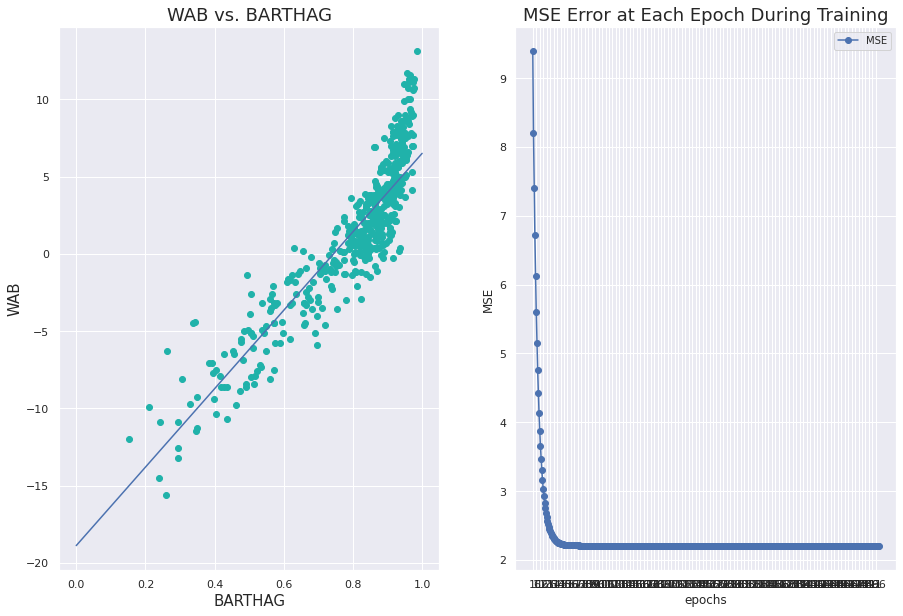

In [ ]:
node = SingleNeuron(linear_activation)
node.train(X, y, alpha = .01, epochs = 500)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(X, y, color = "lightseagreen")
domain = np.linspace(0,1,100)
ax1.plot(domain, node.predict(domain.reshape(-1, 1)))
ax1.set_xlabel("BARTHAG", fontsize = 15)
ax1.set_ylabel("WAB", fontsize = 15)
ax1.set_title("WAB vs. BARTHAG", fontsize = 18)

ax2.plot(range(1, len(node.errors_) + 1), 
         node.errors_[:],
         marker = "o",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(node.errors_) + 1, 5))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)

Beautiful! The two basic single neuron models we have explored thus far are a very important foundation for supervised learning. Next, we explore more complex models!